# EV Bikes Market

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [31]:
df_bikes=pd.read_csv('new_bikes.csv')

In [32]:
df_bikes.shape

(53, 11)

In [33]:
df_bikes.columns

Index(['Unnamed: 0', 'Model', 'Manufacturer', 'Vehicle Type',
       'Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time',
       'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [34]:
df_bikes.sample(5)

,Unnamed: 0,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
11,11,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0
20,20,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0
47,47,Urbanite X2,Electric Vehicle Co.,Scooter,3.2,130,4.0,110000.0,5.0,80.0,2022.0
39,39,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
25,25,Joy e-Ride,Joy E-Bike,Bike,2.2,80,2.5,60000.0,2.0,50.0,2021.0


# Exploratory Data Analysis

In [35]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53 non-null     int64  
 1   Model                   53 non-null     object 
 2   Manufacturer            53 non-null     object 
 3   Vehicle Type            53 non-null     object 
 4   Battery Capacity (kWh)  53 non-null     float64
 5   Range per Charge (km)   53 non-null     int64  
 6   Charging Time           52 non-null     float64
 7   Price                   52 non-null     float64
 8   Power (HP or kW)        52 non-null     float64
 9   Top Speed (km/h)        52 non-null     float64
 10  Year of Manufacture     52 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.7+ KB


In [36]:
null_mask=df_bikes.isnull().any(axis=1)
df_bikes=df_bikes[null_mask==False]

In [37]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              52 non-null     int64  
 1   Model                   52 non-null     object 
 2   Manufacturer            52 non-null     object 
 3   Vehicle Type            52 non-null     object 
 4   Battery Capacity (kWh)  52 non-null     float64
 5   Range per Charge (km)   52 non-null     int64  
 6   Charging Time           52 non-null     float64
 7   Price                   52 non-null     float64
 8   Power (HP or kW)        52 non-null     float64
 9   Top Speed (km/h)        52 non-null     float64
 10  Year of Manufacture     52 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ KB


In [38]:
df_bikes['Vehicle Type'].value_counts()

Vehicle Type
Scooter    41
Bike       11
Name: count, dtype: int64

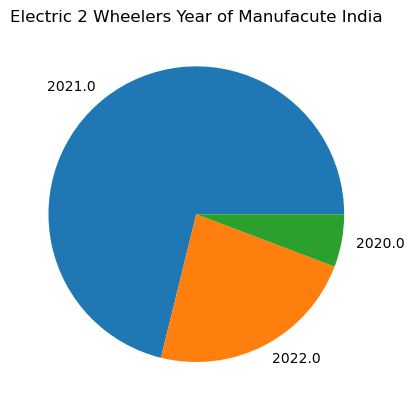

In [39]:
x = df_bikes['Year of Manufacture'].value_counts().plot.pie()
plt.pie(x=[1],radius=0.001,colors='white')
plt.title(label='Electric 2 Wheelers Year of Manufacute India')
plt.ylabel('')
plt.show()

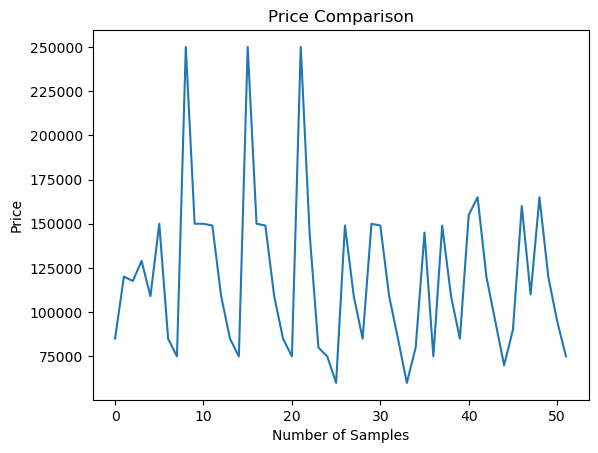

In [40]:
plt.plot(df_bikes['Price'])
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison');

# Segmentation

In [41]:
df=df_bikes
df1=df_bikes
df['Vehicle Type'].replace(to_replace=['Scooter','Bike'],value=[0, 1], inplace=True)

In [42]:
df.columns

Index(['Unnamed: 0', 'Model', 'Manufacturer', 'Vehicle Type',
       'Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time',
       'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [43]:
df=df.drop(['Unnamed: 0', 'Model', 'Manufacturer'],axis=1)

In [44]:
df.head()

,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,0,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,0,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,0,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,0,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,0,2.70,120,3.0,109000.0,5.0,80.0,2021.0


In [45]:
corr = df.corr()
corr.style.background_gradient(cmap='Spectral')

,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
Vehicle Type,1.000000,0.320543,0.286497,-0.076636,0.318706,0.676764,0.108007,0.101519
Battery Capacity (kWh),0.320543,1.000000,0.782845,0.671725,0.874510,0.679582,0.620106,0.037480
Range per Charge (km),0.286497,0.782845,1.000000,0.569228,0.768037,0.745132,0.890465,0.228106
Charging Time,-0.076636,0.671725,0.569228,1.000000,0.663869,0.360537,0.658871,-0.194250
Price,0.318706,0.874510,0.768037,0.663869,1.000000,0.786668,0.669637,-0.063526
Power (HP or kW),0.676764,0.679582,0.745132,0.360537,0.786668,1.000000,0.600609,-0.002850
Top Speed (km/h),0.108007,0.620106,0.890465,0.658871,0.669637,0.600609,1.000000,0.156641
Year of Manufacture,0.101519,0.037480,0.228106,-0.194250,-0.063526,-0.002850,0.156641,1.000000


# PCA

In [46]:
scaler=StandardScaler()
df_scale = scaler.fit_transform(df)

In [47]:
pca = PCA(random_state=42)   
pca.fit_transform(df_scale) 
pca.explained_variance_ratio_

array([0.5753801 , 0.17063963, 0.13710548, 0.05144504, 0.03372341,
       0.01806882, 0.00882305, 0.00481448])

In [48]:
df_pca = pca.transform(df_scale)

In [49]:
df_pca = pd.DataFrame(df_pca, columns = [f'PC{x +1}' for x in range(len(df.columns))])

In [50]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.503101,1.425148,-1.328903,2.213913,0.835666,1.050070,0.157514,-0.115156
1,3.169533,1.915105,-0.903501,1.324738,1.142895,0.537148,-0.442735,0.268217
2,0.018467,2.703396,1.944021,-0.255680,1.495986,-0.330913,0.006035,0.656926
3,0.031777,0.861620,0.045307,0.220340,0.169558,-0.409491,0.093709,-0.010947
4,-0.725688,0.164433,-0.120884,0.751736,-0.593667,0.115340,0.293262,0.077771


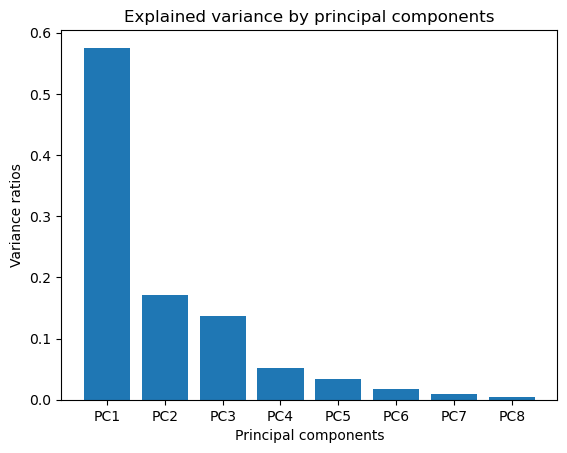

In [51]:
plt.bar(df_pca.columns, pca.explained_variance_ratio_)
plt.title('Explained variance by principal components')
plt.xlabel('Principal components')
plt.ylabel('Variance ratios')
plt.show()

In [52]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [53]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,2.166402,0.575380,0.575380
PC2,1.179781,0.170640,0.746020
PC3,1.057521,0.137105,0.883125
PC4,0.647789,0.051445,0.934570
PC5,0.524478,0.033723,0.968294
PC6,0.383907,0.018069,0.986362
PC7,0.268269,0.008823,0.995186
PC8,0.198169,0.004814,1.000000


In [54]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_scale)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3','PC4','PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.503101,1.425148,-1.328903,2.213913,0.835666
1,3.169533,1.915105,-0.903501,1.324738,1.142895
2,0.018467,2.703396,1.944021,-0.255680,1.495986
3,0.031777,0.861620,0.045307,0.220340,0.169558
4,-0.725688,0.164433,-0.120884,0.751736,-0.593667


In [55]:
factor_loadings = pd.DataFrame(pca.components_, columns = df.columns, index = df_pca.columns).T

In [56]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5
Vehicle Type,0.189185,-0.674632,0.347909,-0.019261,0.511894
Battery Capacity (kWh),0.418409,0.054186,0.041012,-0.564659,-0.174798
Range per Charge (km),0.430051,-0.025729,-0.240889,0.271192,-0.187304
Charging Time,0.330682,0.498655,0.019901,-0.205567,0.687493
Price,0.429481,0.064266,0.138934,-0.274512,-0.366526
Power (HP or kW),0.395473,-0.316033,0.238133,0.230321,-0.179560
Top Speed (km/h),0.391407,0.153223,-0.298930,0.579953,0.139594
Year of Manufacture,0.028212,-0.406365,-0.808384,-0.316601,0.116669


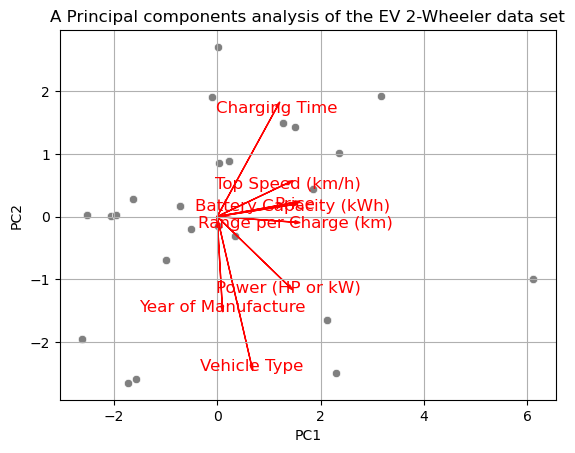

In [57]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

In [58]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=df.columns[:8])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations:")
print(std_devs)
print("Rotation matrix:")
print(rotations_df)

Standard deviations:
[2.2 1.2 1.1 0.6 0.5]
Rotation matrix:
                        PC1  PC2  PC3  PC4  PC5
Vehicle Type            0.2 -0.7  0.3 -0.0  0.5
Battery Capacity (kWh)  0.4  0.1  0.0 -0.6 -0.2
Range per Charge (km)   0.4 -0.0 -0.2  0.3 -0.2
Charging Time           0.3  0.5  0.0 -0.2  0.7
Price                   0.4  0.1  0.1 -0.3 -0.4
Power (HP or kW)        0.4 -0.3  0.2  0.2 -0.2
Top Speed (km/h)        0.4  0.2 -0.3  0.6  0.1
Year of Manufacture     0.0 -0.4 -0.8 -0.3  0.1


In [59]:
df_km = [KMeans(n_clusters = k, random_state = 42).fit(df_scale) for k in range(1, 9)]

/home/abinas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abinas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abinas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/abinas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [60]:
wcss = [model.inertia_ for model in df_km]

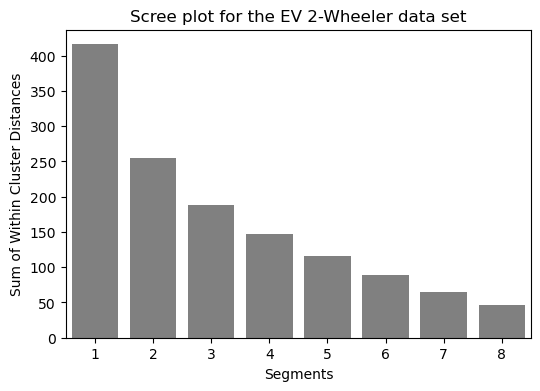

In [61]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(1, 9)), y = wcss, color = 'grey')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.savefig("scree_plot.png")
plt.show()

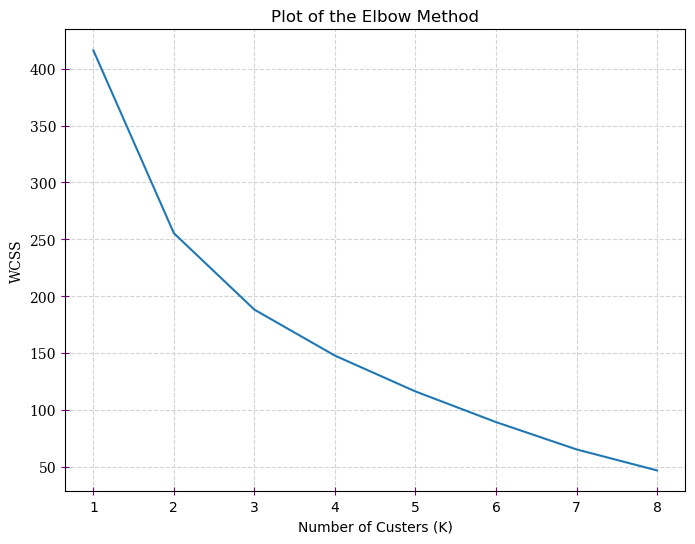

In [62]:
plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1,9), wcss)
plt.xticks(range(1,9))
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [63]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmean.fit(df_pca)

/home/abinas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [64]:
print(kmean.labels_)

[1 1 1 1 1 1 2 2 0 0 1 1 1 2 2 0 0 1 1 2 2 0 1 2 2 2 1 1 2 0 1 1 2 2 2 1 2
 1 1 2 0 1 1 2 2 1 1 1 1 1 2 2]


In [65]:
pd.Series(kmean.labels_).value_counts()

1    26
2    19
0     7
Name: count, dtype: int64

In [66]:
df1['clusters'] = kmean.labels_

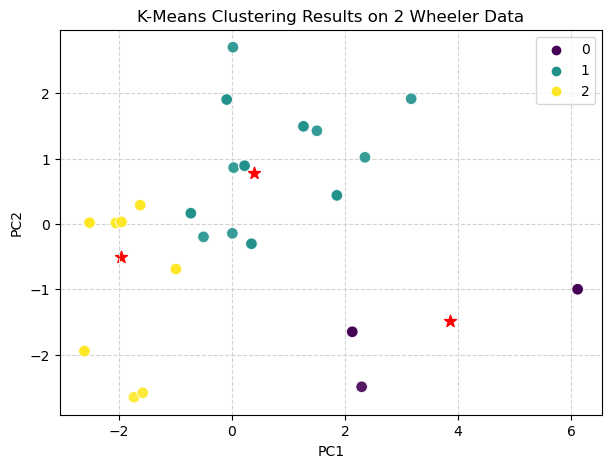

In [67]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.title('K-Means Clustering Results on 2 Wheeler Data')
plt.show()

# Prediction

In [68]:
Cluster_0=df1[df1.clusters==0]
Cluster_1=df1[df1.clusters==1]
Cluster_2=df1[df1.clusters==2]

In [69]:
[Cluster_0["Manufacturer"].value_counts().head(),
Cluster_1["Manufacturer"].value_counts().head(),
Cluster_2["Manufacturer"].value_counts().head()]

[Manufacturer
 Revolt Motors    4
 Tork Motors      3
 Name: count, dtype: int64,
 Manufacturer
 Ather Energy    8
 Pure EV         8
 Bajaj Auto      5
 Ola             2
 TVS             1
 Name: count, dtype: int64,
 Manufacturer
 Okinawa Autotech        8
 Electric Vehicle Co.    5
 Hero Motocorp           3
 Ampere Vehicles         2
 Joy E-Bike              1
 Name: count, dtype: int64]

In [70]:
[Cluster_0["Charging Time"].value_counts().head(),
Cluster_1["Charging Time"].value_counts().head(),
Cluster_2["Charging Time"].value_counts().head()]

[Charging Time
 4.0    4
 5.0    3
 Name: count, dtype: int64,
 Charging Time
 4.5    6
 3.0    6
 5.0    5
 6.5    2
 5.5    2
 Name: count, dtype: int64,
 Charging Time
 3.0    13
 2.5     4
 3.5     2
 Name: count, dtype: int64]

In [71]:
[Cluster_0["Vehicle Type"].value_counts().head(),
Cluster_1["Vehicle Type"].value_counts().head(),
Cluster_2["Vehicle Type"].value_counts().head()]
#0>scooter 1>bike

[Vehicle Type
 1    7
 Name: count, dtype: int64,
 Vehicle Type
 0    26
 Name: count, dtype: int64,
 Vehicle Type
 0    15
 1     4
 Name: count, dtype: int64]

In [72]:
[Cluster_0["Range per Charge (km)"].value_counts().head(),
Cluster_1["Range per Charge (km)"].value_counts().head(),
Cluster_2["Range per Charge (km)"].value_counts().head()]

[Range per Charge (km)
 150    4
 200    3
 Name: count, dtype: int64,
 Range per Charge (km)
 120    7
 116    6
 181    2
 95     2
 146    2
 Name: count, dtype: int64,
 Range per Charge (km)
 100    10
 75      3
 80      2
 120     2
 90      1
 Name: count, dtype: int64]

In [73]:
[Cluster_0["Price"].value_counts().head(),
Cluster_1["Price"].value_counts().head(),
Cluster_2["Price"].value_counts().head()]

[Price
 250000.0    3
 150000.0    3
 155000.0    1
 Name: count, dtype: int64,
 Price
 109000.0    6
 149000.0    5
 150000.0    2
 145000.0    2
 165000.0    2
 Name: count, dtype: int64,
 Price
 85000.0    6
 75000.0    6
 80000.0    2
 60000.0    2
 95000.0    2
 Name: count, dtype: int64]

In [74]:
[Cluster_0["Top Speed (km/h)"].value_counts().head(),
Cluster_1["Top Speed (km/h)"].value_counts().head(),
Cluster_2["Top Speed (km/h)"].value_counts().head()]

[Top Speed (km/h)
 85.0     4
 100.0    3
 Name: count, dtype: int64,
 Top Speed (km/h)
 80.0     15
 90.0      3
 116.0     2
 60.0      2
 85.0      2
 Name: count, dtype: int64,
 Top Speed (km/h)
 60.0    14
 50.0     2
 70.0     2
 65.0     1
 Name: count, dtype: int64]

In [75]:
[Cluster_0["Battery Capacity (kWh)"].value_counts().head(),
Cluster_1["Battery Capacity (kWh)"].value_counts().head(),
Cluster_2["Battery Capacity (kWh)"].value_counts().head()]

[Battery Capacity (kWh)
 3.2    4
 6.2    3
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 4.00    7
 2.90    6
 2.70    6
 3.50    3
 2.98    1
 Name: count, dtype: int64,
 Battery Capacity (kWh)
 2.5    8
 2.2    5
 3.0    4
 2.8    1
 2.9    1
 Name: count, dtype: int64]